In [ ]:
Name:Gurjit Singh Sid:N01634963 Assignment2 Machine Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Load dataset
data = pd.read_csv('bank.csv', header=0)
data = data.dropna()  # Drop missing values


In [5]:
# Display basic info
print(f"Dataset Shape: {data.shape}")
print(f"Columns: {list(data.columns)}")

Dataset Shape: (41188, 21)
Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [6]:
# Group basic education levels into one category
data['education'] = np.where(data['education'].isin(['basic.4y', 'basic.6y', 'basic.9y']), 'Basic', data['education'])


In [7]:
# Display unique values after modification
print("Unique education levels:", data['education'].unique())


Unique education levels: ['Basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate']


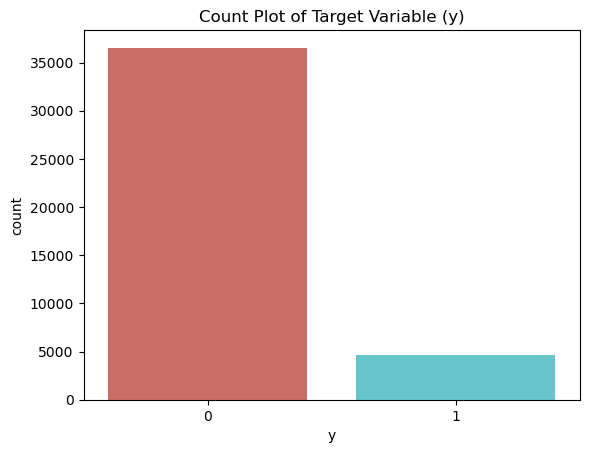

<Figure size 640x480 with 0 Axes>

In [33]:
# Data visualization
sns.countplot(x='y', data=data, palette='hls')
plt.title("Count Plot of Target Variable (y)")
plt.show()
plt.savefig('count_plot')

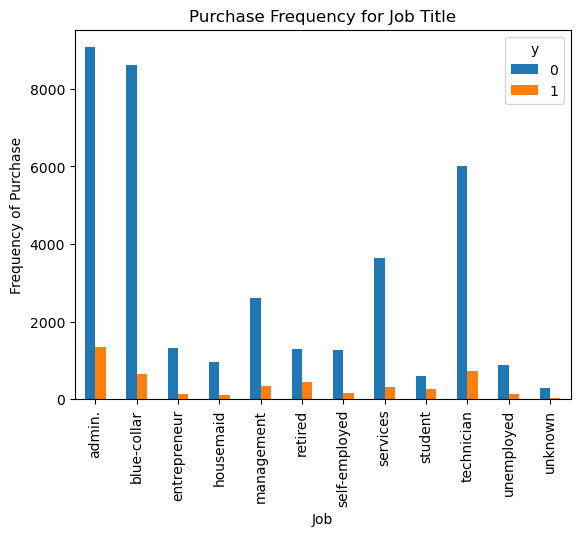

In [5]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

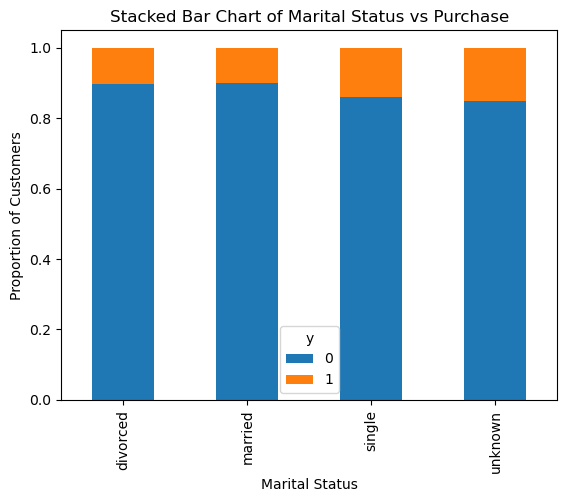

In [6]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

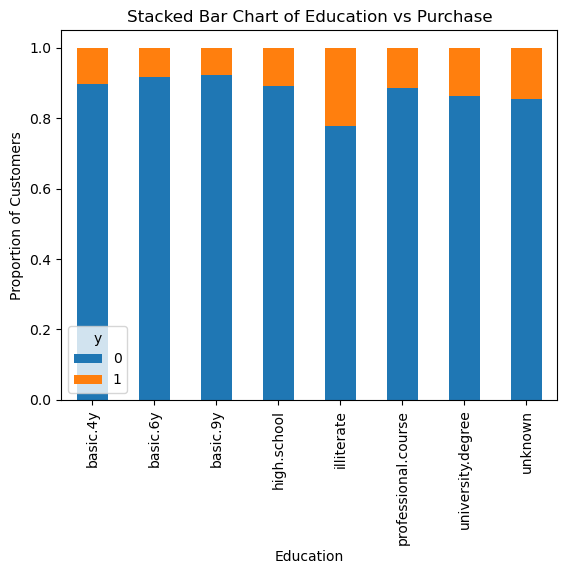

In [7]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')


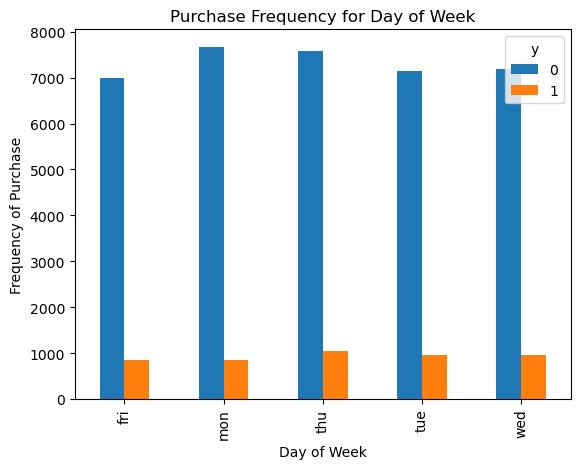

In [8]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

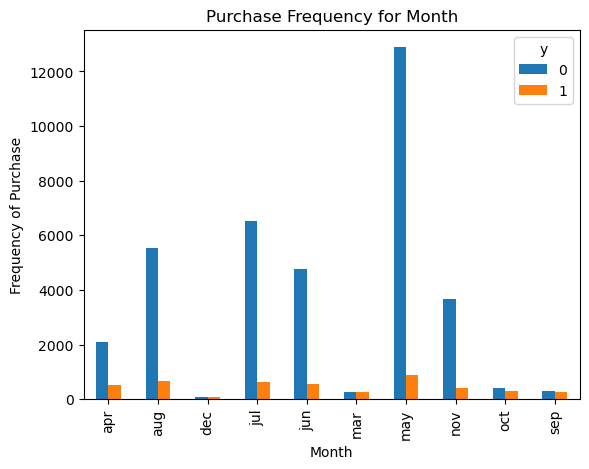

In [9]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

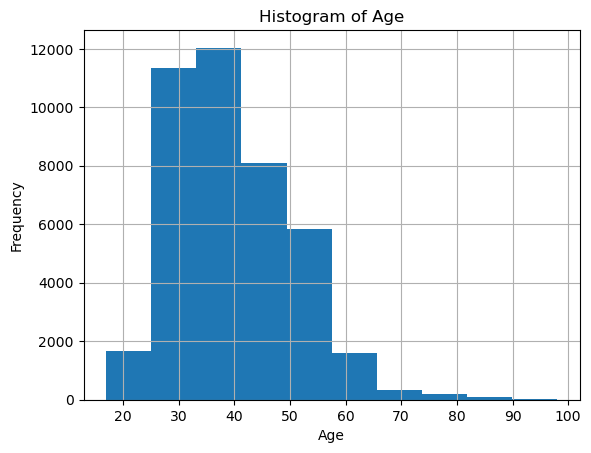

In [10]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

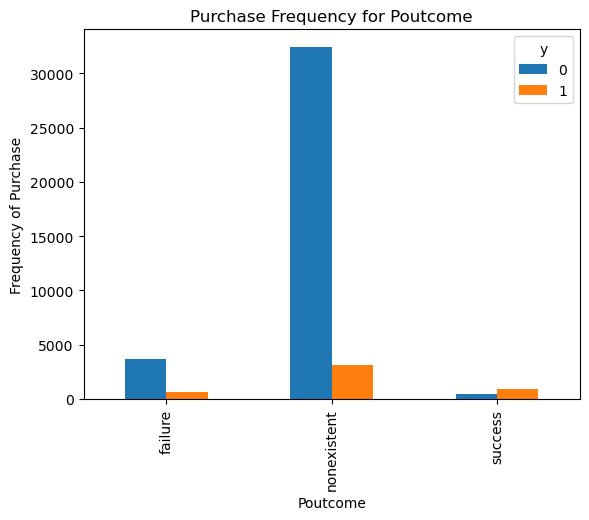

In [11]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [10]:
# Create categorical dummy variables
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in cat_vars:
    cat_list = pd.get_dummies(data[var], prefix=var, drop_first=True)
    data = pd.concat([data, cat_list], axis=1)
    data.drop(var, axis=1, inplace=True)

In [11]:
# Define feature set and target variable
y = data['y']
X = data.drop(columns=['y'])

In [12]:
# Split dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [13]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [14]:
# Standardize numeric features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Initialize and fit Logistic Regression model
logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, y_train)


LogisticRegression()

In [16]:
# Make predictions
y_pred = logreg.predict(X_test)

In [17]:
# Evaluate model performance
print("Confusion Matrix (Before Dropping Column):\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.2f}")

Confusion Matrix (Before Dropping Column):
 [[10314   651]
 [  612   780]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10965
           1       0.55      0.56      0.55      1392

    accuracy                           0.90     12357
   macro avg       0.74      0.75      0.75     12357
weighted avg       0.90      0.90      0.90     12357

Accuracy: 0.90
ROC-AUC Score: 0.75


In [18]:
# Perform Feature Selection using RFE (Recursive Feature Elimination)
rfe = RFE(logreg, n_features_to_select=20)  # Keep top 20 features
rfe.fit(X, y)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [19]:
# Identify and drop the least informative column
least_informative_column = X.columns[np.argmax(rfe.ranking_)]
print(f"Removed Column: {least_informative_column}")
X.drop(columns=[least_informative_column], inplace=True)

Removed Column: default_yes


In [20]:
# Re-split the dataset after dropping the column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [21]:
# Apply SMOTE again to balance the dataset
X_train, y_train = smote.fit_resample(X_train, y_train)

In [22]:
# Standardize data again after column removal
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Train Logistic Regression again
logreg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Predict again
y_pred = logreg.predict(X_test)

# Evaluate model after dropping column
print("Confusion Matrix (After Dropping Column):\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}") # after dropping column
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.2f}") # before dropping column

Confusion Matrix (After Dropping Column):
 [[10314   651]
 [  612   780]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10965
           1       0.55      0.56      0.55      1392

    accuracy                           0.90     12357
   macro avg       0.74      0.75      0.75     12357
weighted avg       0.90      0.90      0.90     12357

Accuracy: 0.90
ROC-AUC Score: 0.75
